In [1]:
import pandas as pd
import seaborn as sns
import numpy as np

#Gráficos
import matplotlib.pyplot as plt

In [2]:
train_data = pd.read_csv('./train.csv')
test_data = pd.read_csv(('./test.csv'))

traindex = train_data.index
testdex = test_data.index

In [3]:
test_data.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


Uno los datos por medio de concat, los test data son los últimos 418 registros, es necesario resetear el índice para evitar valores duplicados

In [45]:
titanic = pd.concat([train_data, test_data],ignore_index=True)

In [5]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
titanic.duplicated().sum()

0

In [7]:
titanic.shape

(1309, 12)

Eliminamos el ID, el nombre y el ticket

In [46]:
titanic.drop(['PassengerId', 'Name','Ticket'], axis='columns',inplace=True)

Tambien se observa que los 418 registros que no tienen 'Survived' son los datos test

In [7]:
titanic.isnull().sum()

Survived     418
Pclass         0
Sex            0
Age          263
SibSp          0
Parch          0
Fare           1
Cabin       1014
Embarked       2
dtype: int64

In [41]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    float64
 1   Pclass    1309 non-null   int64  
 2   Sex       1309 non-null   object 
 3   Age       1046 non-null   float64
 4   SibSp     1309 non-null   int64  
 5   Parch     1309 non-null   int64  
 6   Fare      1308 non-null   float64
 7   Cabin     295 non-null    object 
 8   Embarked  1307 non-null   object 
dtypes: float64(3), int64(3), object(3)
memory usage: 92.2+ KB


In [9]:
titanic[titanic["Survived"].isna()]


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
891,NaN,3,male,34.5,0,0,7.8292,NaN,Q
892,NaN,3,female,47.0,1,0,7.0000,NaN,S
893,NaN,2,male,62.0,0,0,9.6875,NaN,Q
894,NaN,3,male,27.0,0,0,8.6625,NaN,S
895,NaN,3,female,22.0,1,1,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...
1304,NaN,3,male,NaN,0,0,8.0500,NaN,S
1305,NaN,1,female,39.0,0,0,108.9000,C105,C
1306,NaN,3,male,38.5,0,0,7.2500,NaN,S
1307,NaN,3,male,NaN,0,0,8.0500,NaN,S


### Indagamos qué información hay en las cabinas

Con la intención de revisar si las cabinas pueden tener alguna influencia en la sobrevivencia se reemplazan los Nan de la columna cabinas

In [47]:
cabinas =titanic.groupby('Cabin')['Pclass'].count()


In [48]:
cabinas = pd.pivot_table(titanic, values = 'Fare', index = ['Pclass'], columns =['Cabin'], aggfunc='count')

In [49]:
titanic['Cabin'].fillna('N', inplace=True)

In [50]:
titanic.loc[(titanic.Cabin != 'N')& (titanic.Pclass == 1)]

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
1,1.0,1,female,38.0,1,0,71.2833,C85,C
3,1.0,1,female,35.0,1,0,53.1000,C123,S
6,0.0,1,male,54.0,0,0,51.8625,E46,S
11,1.0,1,female,58.0,0,0,26.5500,C103,S
23,1.0,1,male,28.0,0,0,35.5000,A6,S
...,...,...,...,...,...,...,...,...,...
1291,NaN,1,female,30.0,0,0,164.8667,C7,S
1295,NaN,1,male,43.0,1,0,27.7208,D40,C
1298,NaN,1,male,50.0,1,1,211.5000,C80,C
1302,NaN,1,female,37.0,1,0,90.0000,C78,Q


In [51]:
cabin_only = titanic[["Cabin"]].copy()

In [52]:
cabin_only["Deck"] = cabin_only["Cabin"].str.slice(0,1)

In [53]:
cabin_only["Room"] = cabin_only["Cabin"].str.slice(1,5).str.extract("([0-9]+)", expand=False).astype("float")

In [54]:
cabin_only

,Cabin,Deck,Room
0,N,N,NaN
1,C85,C,85.0
2,N,N,NaN
3,C123,C,123.0
4,N,N,NaN
...,...,...,...
1304,N,N,NaN
1305,C105,C,105.0
1306,N,N,NaN
1307,N,N,NaN


In [55]:
cabin_only['Deck'].value_counts()

N    1014
C      94
B      65
D      46
E      41
A      22
F      21
G       5
T       1
Name: Deck, dtype: int64

In [56]:
titanic = titanic.join(cabin_only['Deck']).copy()

In [57]:
titanic.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Deck
0,0.0,3,male,22.0,1,0,7.2500,N,S,N
1,1.0,1,female,38.0,1,0,71.2833,C85,C,C
2,1.0,3,female,26.0,0,0,7.9250,N,S,N
3,1.0,1,female,35.0,1,0,53.1000,C123,S,C
4,0.0,3,male,35.0,0,0,8.0500,N,S,N


In [58]:
titanic.drop({'Cabin'}, axis = 'columns', inplace= True)

Se observa que la tercera clase está más asociada a las cabinas perdidas,  
La primera clase tiene un 20% de cabinas perdidas, la segunda 91% y la tercera 97%

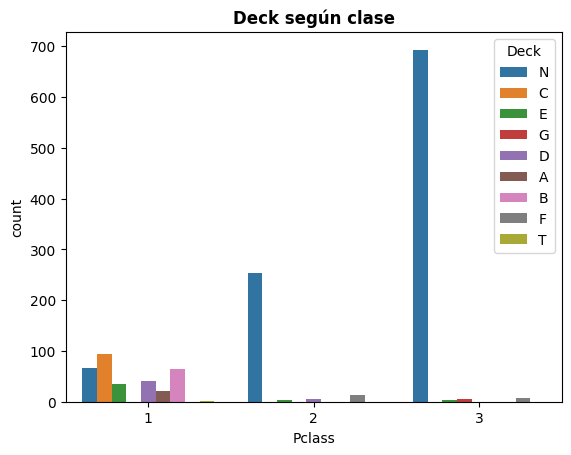

Deck,A,B,C,D,E,F,G,N,T
Pclass,,,,,,,,,
1,6.811146,20.123839,29.102167,12.383901,10.526316,0.000000,0.000000,20.743034,0.309598
2,0.000000,0.000000,0.000000,2.166065,1.444043,4.693141,0.000000,91.696751,0.000000
3,0.000000,0.000000,0.000000,0.000000,0.423131,1.128350,0.705219,97.743300,0.000000


In [23]:
sns.countplot(x='Pclass', hue='Deck', data=titanic)
plt.title('Deck según clase', weight='bold')
plt.show()

table = pd.crosstab(titanic['Pclass'], titanic['Deck'], normalize='index')
table*100

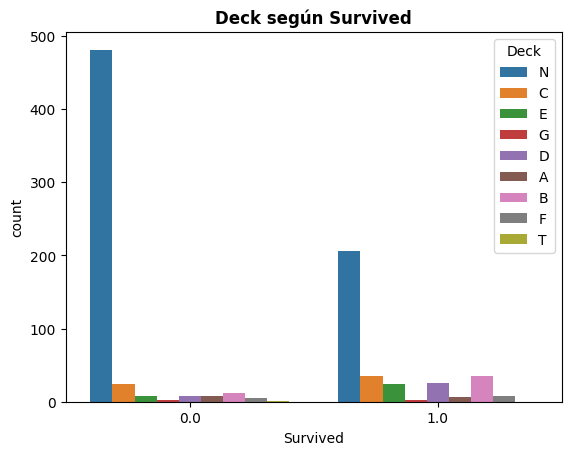

Deck,A,B,C,D,E,F,G,N,T
Survived,,,,,,,,,
0.0,8,12,24,8,8,5,2,481,1
1.0,7,35,35,25,24,8,2,206,0


In [26]:
sns.countplot(x='Survived', hue='Deck', data=titanic)
plt.title('Deck según Survived', weight='bold')
plt.show()

table = pd.crosstab(titanic['Survived'], titanic['Deck'])
table


### Indagamos sobre la variable Embarked

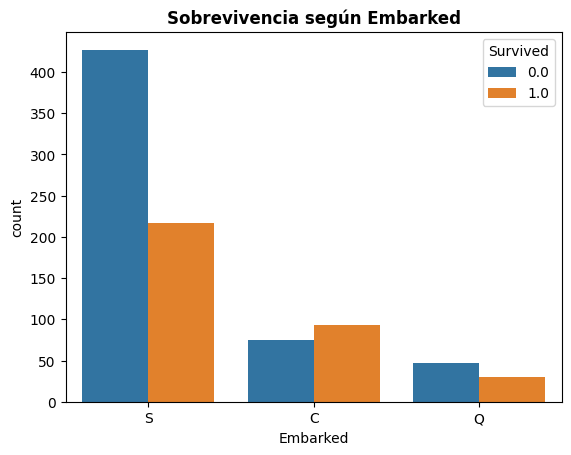

Survived,0.0,1.0
Embarked,,
C,44.642857,55.357143
Q,61.038961,38.961039
S,66.304348,33.695652


In [27]:
sns.countplot(x='Embarked', hue='Survived', data=titanic)
plt.title('Sobrevivencia según Embarked', weight='bold')
plt.show()

table = pd.crosstab(titanic['Embarked'], titanic['Survived'], normalize='index')
table*100

### Indagamos sobre la edad

In [28]:
age_null = titanic[titanic.Age.isnull()]

Los de tercera clase son los que tienen la mayor cantidad de registros de edad perdido +  
el máximo de relaciones de padres/hijos 8 (parch) y máximo de esposo(a)/hermano 9

In [29]:
age_null.groupby('Pclass')[('SibSp','Parch')].describe()

C:\Users\cj_li\AppData\Local\Temp\ipykernel_11376\1580944037.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  age_null.groupby('Pclass')[('SibSp','Parch')].describe()


SibSp                                               Parch            \
        count      mean       std  min  25%  50%  75%  max  count      mean   
Pclass                                                                        
1        39.0  0.153846  0.365518  0.0  0.0  0.0  0.0  1.0   39.0  0.025641   
2        16.0  0.000000  0.000000  0.0  0.0  0.0  0.0  0.0   16.0  0.000000   
3       208.0  0.581731  1.607066  0.0  0.0  0.0  0.0  8.0  208.0  0.302885   

                                           
             std  min  25%  50%  75%  max  
Pclass                                     
1       0.160128  0.0  0.0  0.0  0.0  1.0  
2       0.000000  0.0  0.0  0.0  0.0  0.0  
3       1.058479  0.0  0.0  0.0  0.0  9.0

Veamos como se comporta la edad y la sobrevivencia.  
Para esto será necesario categorizar la edad.  
Se tiene 263 datos de edad perdidos, se tratarán por medio de imputación según el vecino más cercano

In [30]:
#Creamos 8 intervalos
rango = titanic['Age'].max() - titanic['Age'].min()
largo_intervalo = int(np.round(rango / 8))

In [31]:
#Calculamos los límites inferiores y superirores de los intervalos

limite_inferior = int(np.floor( titanic['Age'].min()))
limite_superior = int(np.floor( titanic['Age'].max()))

#Creamos la lista de intervalos
total_intervalos = [i for i in range(limite_inferior, limite_superior+largo_intervalo, largo_intervalo)]

In [32]:
total_intervalos

[0, 10, 20, 30, 40, 50, 60, 70, 80]

In [33]:
#Etiquetas de los intervalos
etiquetas_intervalos = ['0-10','10-20','20-30','30-40','40-50','50-60','60-70','70-80']

In [34]:
titanic['Age_intervalo'] = pd.cut(x=titanic['Age'], bins=total_intervalos, labels=etiquetas_intervalos, include_lowest=True)

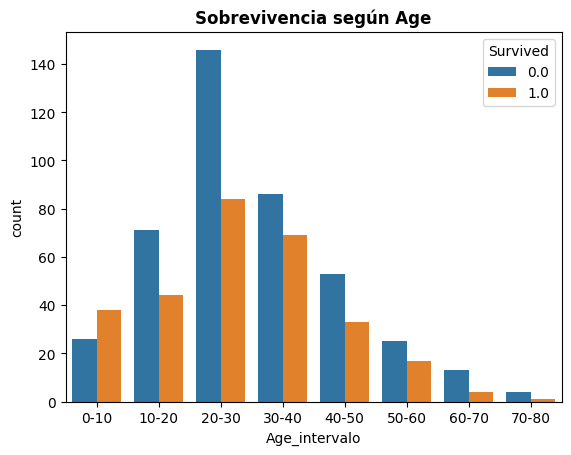

Survived,0.0,1.0
Age_intervalo,,
0-10,40.625000,59.375000
10-20,61.739130,38.260870
20-30,63.478261,36.521739
30-40,55.483871,44.516129
40-50,61.627907,38.372093
50-60,59.523810,40.476190
60-70,76.470588,23.529412
70-80,80.000000,20.000000


In [35]:
sns.countplot(x='Age_intervalo', hue='Survived', data=titanic)
plt.title('Sobrevivencia según Age', weight='bold')
plt.show()

table = pd.crosstab(titanic['Age_intervalo'], titanic['Survived'], normalize='index')
table*100

Ahora veremos como se relaciona la edad con la Clase

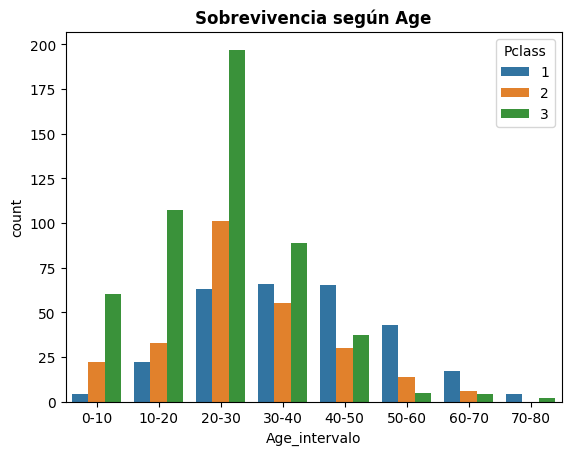

Pclass,1,2,3
Age_intervalo,,,
0-10,4.651163,25.581395,69.767442
10-20,13.580247,20.370370,66.049383
20-30,17.451524,27.977839,54.570637
30-40,31.428571,26.190476,42.380952
40-50,49.242424,22.727273,28.030303
50-60,69.354839,22.580645,8.064516
60-70,62.962963,22.222222,14.814815
70-80,66.666667,0.000000,33.333333


In [117]:
sns.countplot(x='Age_intervalo', hue='Pclass', data=titanic)
plt.title('Sobrevivencia según Age', weight='bold')
plt.show()

table = pd.crosstab(titanic['Age_intervalo'], titanic['Pclass'], normalize='index')
table*100

### Revisamos la variable Deck

<AxesSubplot: xlabel='Deck', ylabel='Age'>

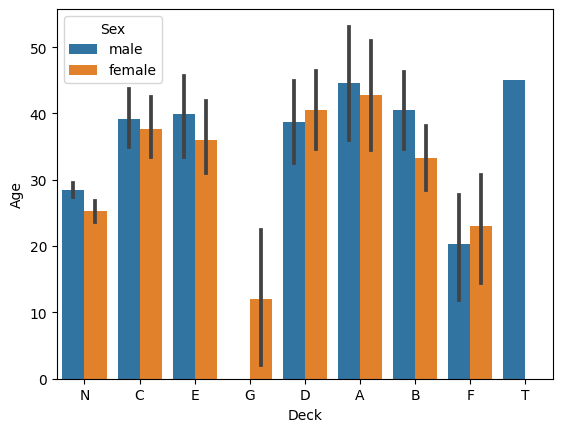

In [144]:
sns.barplot(x='Deck', y='Age', hue ='Sex', data=titanic)

In [36]:
titanic_2 = titanic.copy()

In [381]:
titanic = titanic_2.copy()

In [175]:
titanic_sin_N = titanic.query("Deck != 'N'")

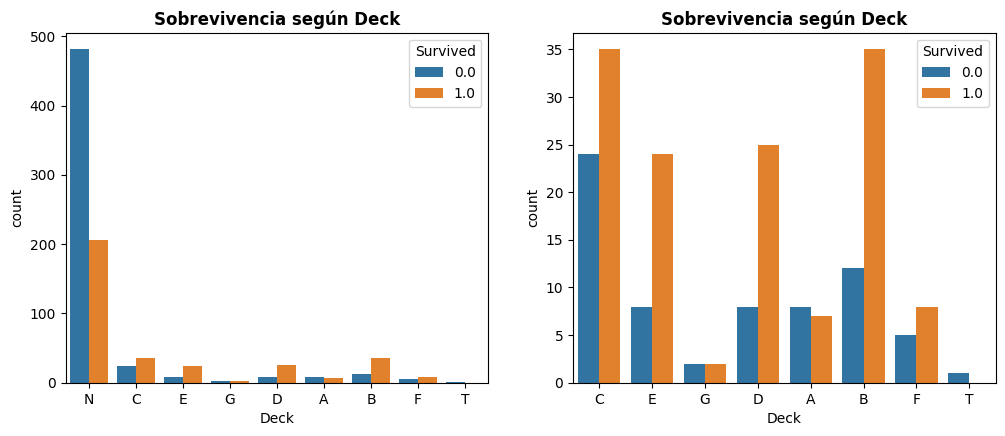

Survived,0.0,1.0
Deck,,
A,53.333333,46.666667
B,25.531915,74.468085
C,40.677966,59.322034
D,24.242424,75.757576
E,25.000000,75.000000
F,38.461538,61.538462
G,50.000000,50.000000
N,70.014556,29.985444
T,100.000000,0.000000


In [176]:
plt.figure(figsize=(12,10))

plt.subplot(2,2,1)
sns.countplot(x='Deck', hue='Survived', data=titanic)
plt.title('Sobrevivencia según Deck', weight='bold')

plt.subplot(2,2,2)
sns.countplot(x='Deck', hue='Survived', data=titanic_sin_N)
plt.title('Sobrevivencia según Deck', weight='bold')

plt.show()

table = pd.crosstab(titanic['Deck'], titanic['Survived'], normalize='index')
table*100

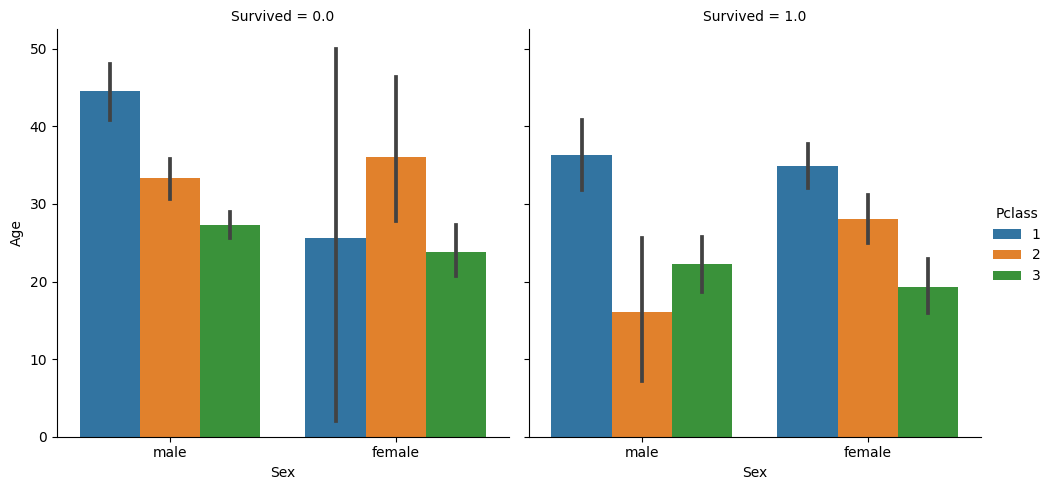

In [39]:
sns.catplot(x="Sex", y="Age", hue="Pclass", col="Survived", data=titanic, kind="bar")

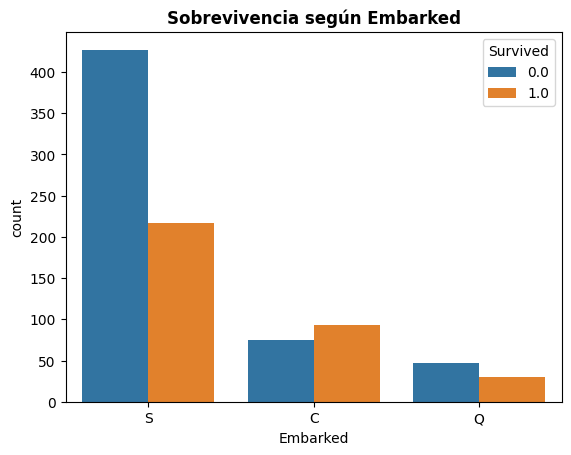

Survived,0.0,1.0
Embarked,,
C,44.642857,55.357143
Q,61.038961,38.961039
S,66.304348,33.695652


In [40]:
sns.countplot(x='Embarked', hue='Survived', data=titanic)
plt.title('Sobrevivencia según Embarked', weight='bold')
plt.show()

table = pd.crosstab(titanic['Embarked'], titanic['Survived'], normalize='index')
table*100

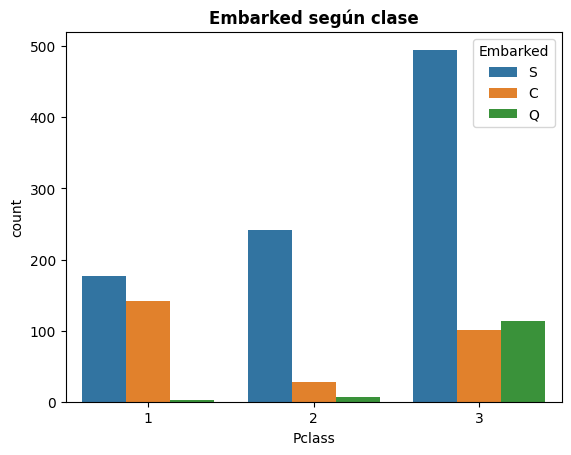

Embarked,C,Q,S
Pclass,,,
1,43.925234,0.934579,55.140187
2,10.108303,2.527076,87.364621
3,14.245416,15.937941,69.816643


In [41]:
sns.countplot(x='Pclass', hue='Embarked', data=titanic)
plt.title('Embarked según clase', weight='bold')
plt.show()

table = pd.crosstab(titanic['Pclass'], titanic['Embarked'], normalize='index')
table*100

Vemos como se comporta la supervivencia de las personas según tenian familia o venian solos

In [42]:
titanic.groupby(['Survived', 'SibSp', 'Parch'])['Survived'].count().unstack().fillna('-')

Parch               0     1     2    4    5    3    6
Survived SibSp                                       
0.0      0      374.0  13.0   8.0  1.0  2.0    -    -
         1       59.0  23.0   7.0  3.0  2.0  2.0  1.0
         2       12.0   1.0   2.0    -    -    -    -
         3          -   7.0   5.0    -    -    -    -
         4          -   9.0   6.0    -    -    -    -
         5          -     -   5.0    -    -    -    -
         8          -     -   7.0    -    -    -    -
1.0      0      163.0  25.0  21.0    -    -  1.0    -
         1       64.0  34.0  12.0    -  1.0  1.0    -
         2        4.0   6.0   2.0    -    -  1.0    -
         3        2.0     -   2.0    -    -    -    -
         4          -     -   3.0    -    -    -    -

Se crea la columna que indica si la persona tiene familia (1) o iba sola (0)

In [59]:
titanic['Family'] = np.where(((titanic['Parch'] > 0) & (titanic['SibSp'] > 0)), 1, 0)

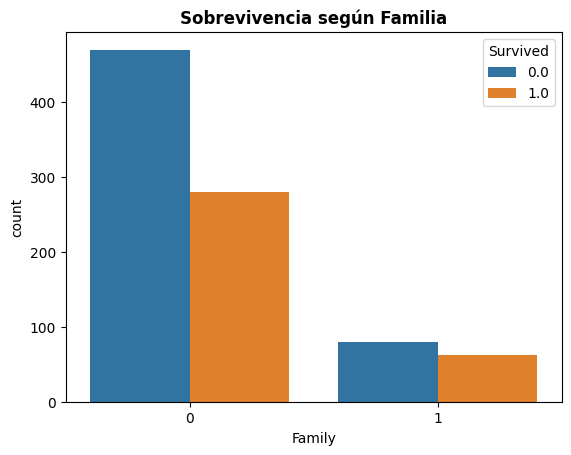

Survived,0.0,1.0
Family,,
0,0.626168,0.373832
1,0.563380,0.436620


In [23]:
sns.countplot(x='Family', hue='Survived', data=titanic)
plt.title('Sobrevivencia según Familia', weight='bold')
plt.show()

table = pd.crosstab(titanic['Family'], titanic['Survived'], normalize='index')
table

### Resumen del EDA mediante gráfica

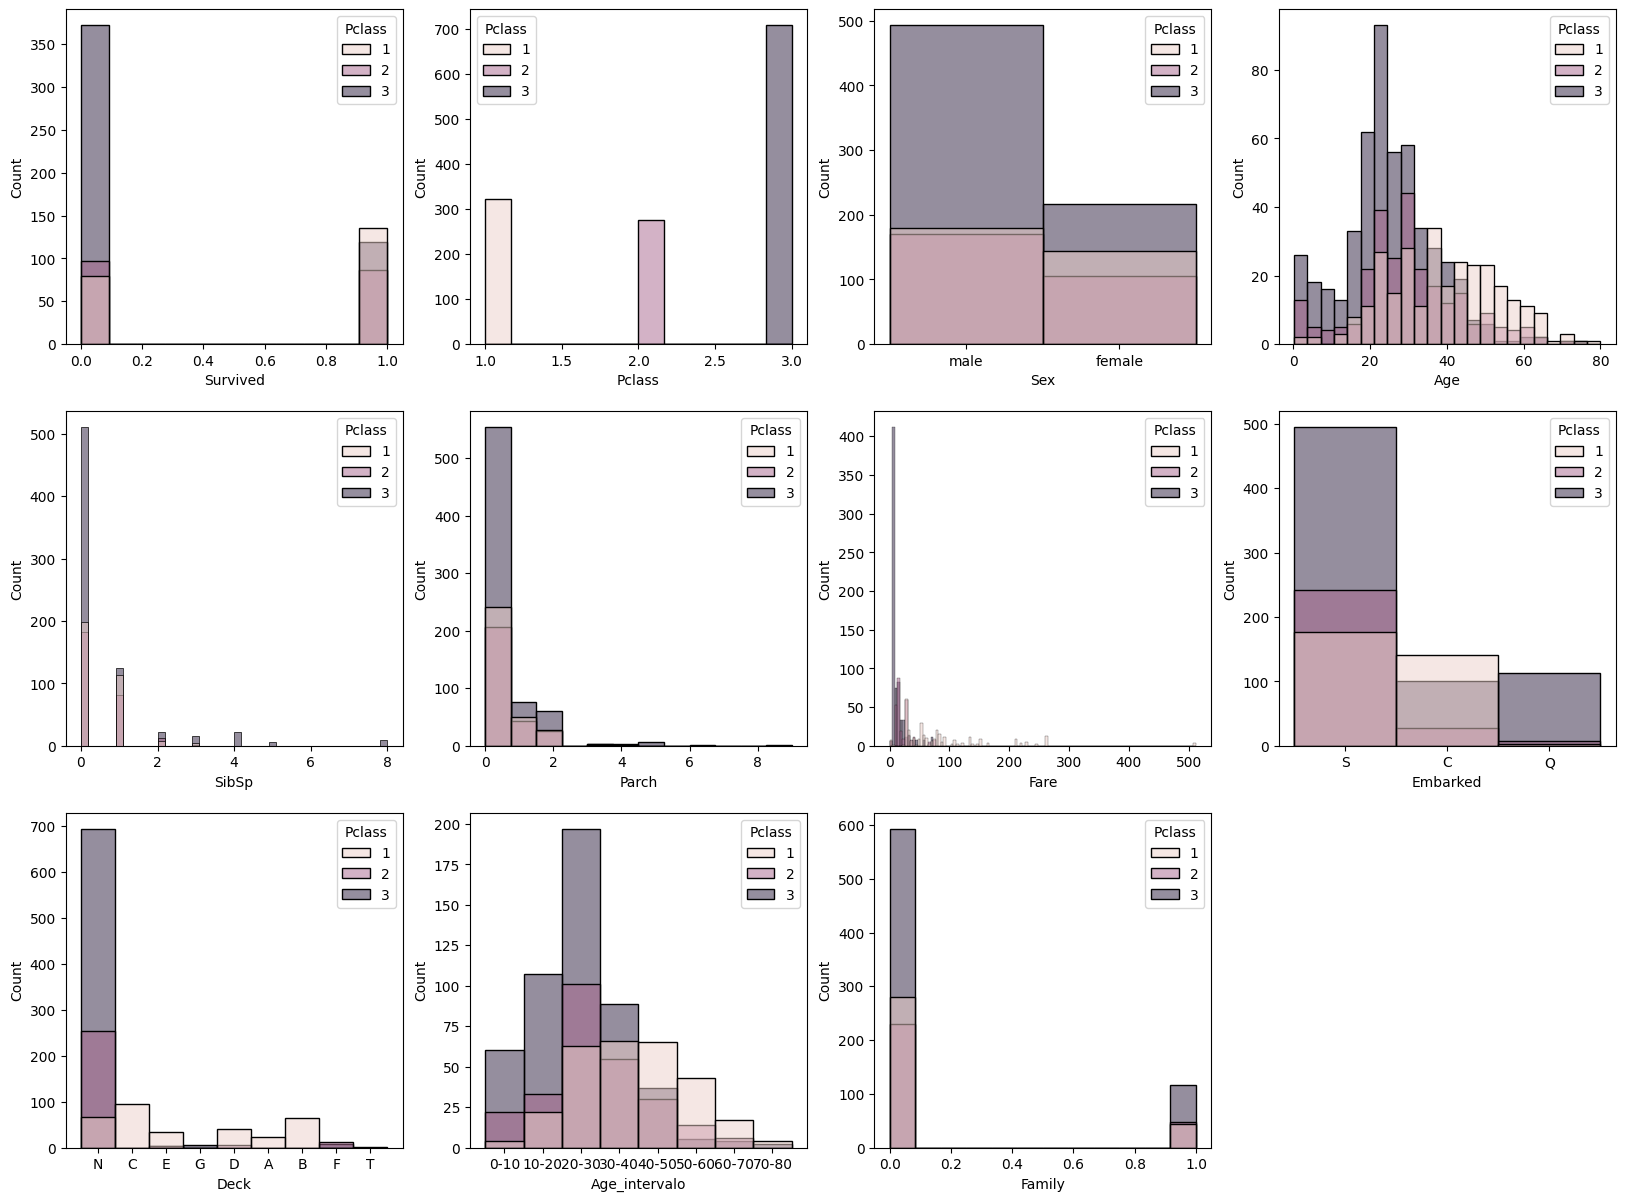

In [45]:
plt.figure(figsize=(20,20))
for i, v in enumerate(titanic):
    plt.subplot(4,4,i+1)
    sns.histplot(x = v , data = titanic, hue='Pclass')
    
plt.show()

### Tratamiento de MV

In [46]:
titanic.isnull().sum()

Survived         418
Pclass             0
Sex                0
Age              263
SibSp              0
Parch              0
Fare               1
Embarked           2
Deck               0
Age_intervalo    263
Family             0
dtype: int64

Se observa que la mayor cantidad de datos perdidos están en la variable Age, omitiendo la variable objetivo 'Survived'.  
Partiremos con la edad, primera aproximación, imputar la edad por el promedio de la clase

In [60]:
titanic.groupby('Pclass')['Age'].mean()

Pclass
1    39.159930
2    29.506705
3    24.816367
Name: Age, dtype: float64

In [61]:
class_age = {1:39, 2:29, 3:25}

In [62]:
def fill_age(columns):
    age = columns[0]
    pclass = np.int64(columns[1])
    return class_age[pclass] if pd.isnull(age) else age

In [63]:
titanic['Age_median'] = titanic[['Age', 'Pclass']].apply(fill_age, axis=1)

Se observa que altera la curva de distribución

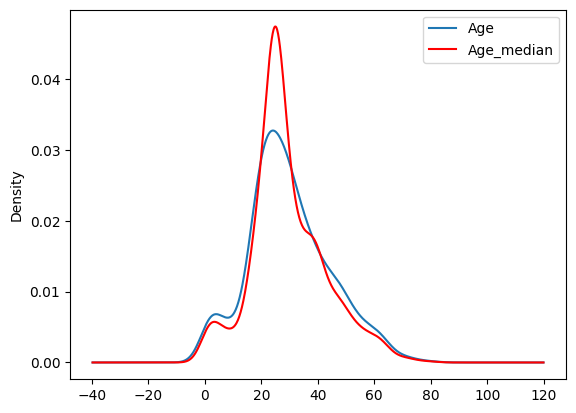

In [64]:
fig = plt.figure()
ax = fig.add_subplot(111)

titanic['Age'].plot(kind='kde', ax=ax)

titanic['Age_median'].plot(kind='kde', ax=ax, color='red')


lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

Para imputar las variables faltantes, aplicaré una imputación según el vecino más cercano.  
El algoritmo trabaja con distancias, por lo tanto, es aplicar un encoder y estandarizar las variables.  
Primero imputamos las otras variables faltantes

In [65]:
#Fare según el promedio de la clase
titanic.groupby('Pclass')['Fare'].mean()

Pclass
1    87.508992
2    21.179196
3    13.302889
Name: Fare, dtype: float64

In [66]:
class_fare = {1:87.508992, 2:21.179196, 3:13.302889}

In [67]:
def fill_fare(columns):
    fare = columns[0]
    pclass = np.int64(columns[1])
    return class_fare[pclass] if pd.isnull(fare) else fare

In [68]:
titanic['Fare'] = titanic[['Fare', 'Pclass']].apply(fill_fare, axis=1)

In [69]:
titanic.groupby('Pclass')['Embarked'].describe()

,count,unique,top,freq
Pclass,,,,
1,321,3,S,177
2,277,3,S,242
3,709,3,S,495


In [70]:
#Embarked según el dato que ma´s se repite
titanic['Embarked']= titanic['Embarked'].fillna('S')

Antes de hacer el encoder, debemos aislar la variable objetivo

In [71]:
#titanic_y = pd.DataFrame(titanic['Survived'])
titanic.drop(['SibSp','Parch','Age_median'], axis='columns',inplace=True)

### Aplicación de WOES

In [72]:
#Función auxiliar para la creación de WOES

def woes_iv(df, col_cat, y):
    # Se crea tabla de frecuencias
    paraWoe = pd.crosstab(df[col_cat], df[y])
    
    # Se calculan Woes y elementos que se sumaran para obtener IV
    paraWoe["N%"] = paraWoe[0] / paraWoe[0].sum()
    paraWoe["P%"] = paraWoe[1] / paraWoe[1].sum()
    paraWoe["WOE"] = np.log(paraWoe["P%"]/paraWoe["N%"])
    paraWoe["CalcIV"] = paraWoe["WOE"] * (paraWoe["P%"] - paraWoe["N%"])
    
    IV = paraWoe["CalcIV"].sum()

    paraWoe.drop("CalcIV", axis=1, inplace=True)
    
    return paraWoe, IV

In [73]:
#WOES datos
dfWOES, IV = woes_iv(titanic, 'Embarked', 'Survived')
print(f"IV: {IV}")
dfWOES

IV: 0.11992314886008477


Survived,0.0,1.0,N%,P%,WOE
Embarked,,,,,
C,75,93,0.136612,0.271930,0.688399
Q,47,30,0.085610,0.087719,0.024337
S,427,219,0.777778,0.640351,-0.194425


In [74]:
# Codificacion con WOE
codWOE_embarked = dfWOES["WOE"].reset_index(level = 0)
codWOE_embarked

,Embarked,WOE
0,C,0.688399
1,Q,0.024337
2,S,-0.194425


In [75]:
# Lista de condiciones
condiciones = [
    (titanic["Embarked"] == "C"),
    (titanic["Embarked"] == "Q"),
    (titanic["Embarked"] == "S")
                ]

# Lista de valores a asginar para cada condicion
valores = [codWOE_embarked.WOE[0], 
           codWOE_embarked.WOE[1],
           codWOE_embarked.WOE[2]
          ]

# Se crea nueva columna y se usa np.select para asignar valores 
titanic["Embarked"] = np.select(condiciones, valores)

titanic["Embarked"].unique()

array([-0.19442458,  0.68839908,  0.02433748])

In [77]:
#WOES datos
dfWOES, IV = woes_iv(titanic, 'Deck', 'Survived')
print(f"IV: {IV}")
dfWOES

IV: inf


c:\Users\cj_li\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\core\arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


Survived,0.0,1.0,N%,P%,WOE
Deck,,,,,
A,8,7,0.014572,0.020468,0.339756
B,12,35,0.021858,0.102339,1.543729
C,24,35,0.043716,0.102339,0.850582
D,8,25,0.014572,0.073099,1.612722
E,8,24,0.014572,0.070175,1.571900
F,5,8,0.009107,0.023392,0.943291
G,2,2,0.003643,0.005848,0.473288
N,481,206,0.876138,0.602339,-0.374703
T,1,0,0.001821,0.000000,-inf


In [81]:
# Codificacion con WOE
codWOE_deck = dfWOES["WOE"].reset_index(level = 0)
codWOE_deck

,Deck,WOE
0,A,0.339756
1,B,1.543729
2,C,0.850582
3,D,1.612722
4,E,1.571900
5,F,0.943291
6,G,0.473288
7,N,-0.374703
8,T,-inf


In [82]:
# Lista de condiciones
condiciones = [
    (titanic["Deck"] == "A"),
    (titanic["Deck"] == "B"),
    (titanic["Deck"] == "C"),
    (titanic["Deck"] == "D"),
    (titanic["Deck"] == "E"),
    (titanic["Deck"] == "F"),
    (titanic["Deck"] == "G"),
    (titanic["Deck"] == "N"),
    (titanic["Deck"] == "T")
                ]

# Lista de valores a asginar para cada condicion
valores = [codWOE_deck.WOE[0], 
           codWOE_deck.WOE[1],
           codWOE_deck.WOE[2],
           codWOE_deck.WOE[3],
           codWOE_deck.WOE[4],
           codWOE_deck.WOE[5],
           codWOE_deck.WOE[6],
           codWOE_deck.WOE[7],
           codWOE_deck.WOE[8],
          ]

# Se crea nueva columna y se usa np.select para asignar valores 
titanic["Deck"] = np.select(condiciones, valores)

titanic["Deck"].unique()

array([-0.3747034 ,  0.85058194,  1.57189999,  0.4732877 ,  1.61272199,
        0.33975631,  1.54372912,  0.94329133,        -inf])

In [84]:
titanic_y = pd.DataFrame(titanic['Survived'])
titanic.drop(['Survived'], axis='columns',inplace=True)
titanic.head()

,Pclass,Sex,Age,Fare,Embarked,Deck,Family
0,3,male,22.0,7.2500,-0.194425,-0.374703,0
1,1,female,38.0,71.2833,0.688399,0.850582,0
2,3,female,26.0,7.9250,-0.194425,-0.374703,0
3,1,female,35.0,53.1000,-0.194425,0.850582,0
4,3,male,35.0,8.0500,-0.194425,-0.374703,0


In [85]:
titanic['Sex'] = titanic['Sex'].replace({'male': 1, 'female': 0})

In [104]:
titanic = titanic.replace([float('-inf')], float('nan'))

In [105]:
titanic['Deck'].sort_values()

0     -0.374703
812   -0.374703
813   -0.374703
814   -0.374703
816   -0.374703
         ...   
765    1.612722
21     1.612722
136    1.612722
748    1.612722
339         NaN
Name: Deck, Length: 1309, dtype: float64

In [88]:
from sklearn.preprocessing import StandardScaler

In [107]:
scaler = StandardScaler().fit(titanic)
titanic_esc = pd.DataFrame(scaler.transform(titanic))
titanic_esc.columns = titanic.columns.tolist() 
titanic_esc.head()

,Pclass,Sex,Age,Fare,Embarked,Deck,Family
0,0.841916,0.743497,-0.547050,-0.503271,-0.575056,-0.514493,-0.432161
1,-1.546098,-1.344995,0.563552,0.734756,1.930104,1.282949,-0.432161
2,0.841916,-1.344995,-0.269400,-0.490220,-0.575056,-0.514493,-0.432161
3,-1.546098,-1.344995,0.355314,0.383198,-0.575056,1.282949,-0.432161
4,0.841916,0.743497,0.355314,-0.487804,-0.575056,-0.514493,-0.432161


In [108]:
titanic_esc.isnull().sum()

Pclass        0
Sex           0
Age         263
Fare          0
Embarked      0
Deck          1
Family        0
dtype: int64

### En este punto, probaré imputar los MV de edad por medio de KNNImputer

In [109]:
from sklearn.impute import KNNImputer

In [115]:
# Crear un imputador KNN
imputer = KNNImputer(n_neighbors=3, weights='distance', metric='nan_euclidean')

# Imputar los valores perdidos en los datos
titanic_imputed = imputer.fit_transform(titanic_esc)

In [116]:
titanic_imputed = pd.DataFrame(titanic_imputed, columns=titanic_esc.columns)

In [117]:
titanic_imputed.head()

,Pclass,Sex,Age,Fare,Embarked,Deck,Family
0,0.841916,0.743497,-0.547050,-0.503271,-0.575056,-0.514493,-0.432161
1,-1.546098,-1.344995,0.563552,0.734756,1.930104,1.282949,-0.432161
2,0.841916,-1.344995,-0.269400,-0.490220,-0.575056,-0.514493,-0.432161
3,-1.546098,-1.344995,0.355314,0.383198,-0.575056,1.282949,-0.432161
4,0.841916,0.743497,0.355314,-0.487804,-0.575056,-0.514493,-0.432161


## Modelamiento

### Separación de muestras

Separaré las muestras:  

En primer lugar almacenaré los datos con edad faltante y los trataré como datos target.  
Posteriormente, eliminaré los registros faltantes del dataframe prinpcipal y lo trataré como subdata, con la cual haré testeo y entrenamiento

In [118]:
titanic = pd.concat([titanic_y,titanic_imputed], ignore_index=True, axis = 1)
columnas = list(titanic_y.columns) + list(titanic_imputed.columns)
titanic.columns = columnas

In [120]:
titanic.isna().sum()

Survived    418
Pclass        0
Sex           0
Age           0
Fare          0
Embarked      0
Deck          0
Family        0
dtype: int64

In [121]:
titanic_test = titanic[titanic.Survived.isnull()]
titanic_test = titanic_test.drop(['Survived'], axis='columns')
titanic_test.head()

,Pclass,Sex,Age,Fare,Embarked,Deck,Family
891,0.841916,0.743497,0.320607,-0.492073,0.045718,-0.514493,-0.432161
892,0.841916,-1.344995,1.188265,-0.508104,-0.575056,-0.514493,-0.432161
893,-0.352091,0.743497,2.229454,-0.456144,0.045718,-0.514493,-0.432161
894,0.841916,0.743497,-0.199987,-0.475961,-0.575056,-0.514493,-0.432161
895,0.841916,-1.344995,-0.547050,-0.405875,-0.575056,-0.514493,2.313951


In [122]:
titanic_train = titanic.dropna()

In [123]:
titanic_train_X = titanic_train.drop(['Survived'], axis='columns')
titanic_train_y = pd.DataFrame(titanic_train['Survived'])

In [124]:
titanic_train_X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    891 non-null    float64
 1   Sex       891 non-null    float64
 2   Age       891 non-null    float64
 3   Fare      891 non-null    float64
 4   Embarked  891 non-null    float64
 5   Deck      891 non-null    float64
 6   Family    891 non-null    float64
dtypes: float64(7)
memory usage: 55.7 KB


### Se realizará una reducción de variables mediante componentes principales

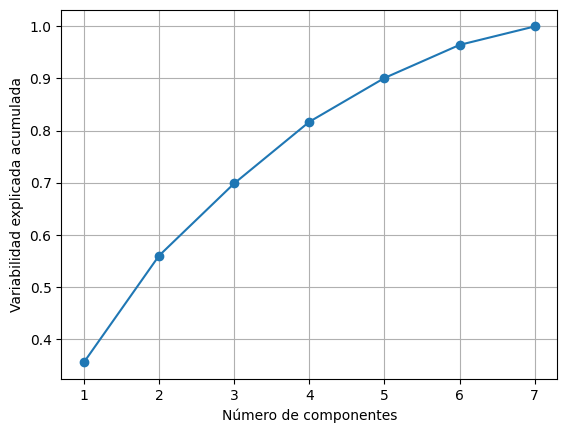

In [431]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as  plt
pca_model = PCA()
pca_model.fit(titanic_train_X)
plt.plot(range(1,8),pca_model.explained_variance_ratio_.cumsum(), marker = 'o')
plt.xlabel('Número de componentes')
plt.ylabel('Variabilidad explicada acumulada')
plt.grid()

Se hará el corte considerando explicar el 80% de los datos

In [432]:
pca_model = PCA(n_components = 4)
pca_model.fit(titanic_train_X)
pca_titanic_train_X = pd.DataFrame(pca_model.transform(titanic_train_X))
pca_titanic_train_X.head()

,0,1,2,3
0,-1.345684,-0.486433,0.185015,0.192068
1,3.099507,0.339156,-1.521890,-0.236233
2,-0.960993,0.417005,-0.490545,-1.452336
3,2.351414,0.135858,0.320296,-1.497491
4,-1.090445,-0.948594,0.309304,0.032971


## Probar modelos

### División de datos

In [125]:
from sklearn.model_selection import train_test_split

In [126]:
train_X, test_X, train_y, test_y = train_test_split(titanic_train_X, titanic_train_y, test_size=0.2, random_state=2023)

In [ ]:
#Probar modelos con los PCA
train_X, test_X, train_y, test_y = train_test_split(pca_titanic_train_X, titanic_train_y, test_size=0.2, random_state=2023)

### Regresión Logística

In [133]:
from sklearn.metrics import accuracy_score,roc_curve, roc_auc_score, classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression

In [128]:
# Se instancia y entrena el modelo de regresión logistica 
modelo_regresion_logi= LogisticRegression(random_state =2023).fit(train_X, train_y)

c:\Users\cj_li\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [129]:
# accuracy
print(f"Accuracy train: {accuracy_score(train_y, modelo_regresion_logi.predict(train_X))}")
print(f"Accuracy test : {accuracy_score(test_y, modelo_regresion_logi.predict(test_X))}")

Accuracy train: 0.8061797752808989
Accuracy test : 0.776536312849162


In [130]:
# Se instancia la predicción del modelo
y_reglog_predict= modelo_regresion_logi.predict(test_X)

In [131]:
accuracy = accuracy_score(
            y_true    = test_y,
            y_pred    = y_reglog_predict,
            normalize = True
           )
print("")
print(f"El accuracy de test es: {100*accuracy}%")


El accuracy de test es: 77.6536312849162%


In [135]:
#Reportamos nuestras principales métricas de clasificación
print(classification_report(test_y, y_reglog_predict))
print(confusion_matrix(test_y,y_reglog_predict))

              precision    recall  f1-score   support

         0.0       0.83      0.81      0.82       113
         1.0       0.69      0.73      0.71        66

    accuracy                           0.78       179
   macro avg       0.76      0.77      0.76       179
weighted avg       0.78      0.78      0.78       179

[[91 22]
 [18 48]]


In [143]:
from sklearn.model_selection import GridSearchCV


lr_clf = LogisticRegression()

param_grid = [    
{'penalty' : ['l1', 'l2'],
'C' : np.logspace(-4, 4, 20),
'solver' : ['lbfgs','sag','saga'],
'max_iter' : [100, 500, 1000],
 'class_weight': ['balanced']
}
]


lr_cv = GridSearchCV(estimator=lr_clf, param_grid=param_grid, scoring='accuracy',
                     verbose=1, n_jobs=-2, cv=10)
lr_cv.fit(train_X, train_y)
pred_values_lr_cv = lr_cv.predict(test_X)



Fitting 10 folds for each of 360 candidates, totalling 3600 fits


c:\Users\cj_li\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
1200 fits failed out of a total of 3600.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
600 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\cj_li\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\cj_li\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py", line 1091, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "c:\Users\cj_li\AppData\Local\Programs

In [144]:
print(lr_cv.best_params_)
print(classification_report(test_y,pred_values_lr_cv))
print(confusion_matrix(test_y,pred_values_lr_cv))

{'C': 0.23357214690901212, 'class_weight': 'balanced', 'max_iter': 100, 'penalty': 'l1', 'solver': 'saga'}
              precision    recall  f1-score   support

         0.0       0.86      0.73      0.79       113
         1.0       0.63      0.79      0.70        66

    accuracy                           0.75       179
   macro avg       0.74      0.76      0.75       179
weighted avg       0.77      0.75      0.76       179

[[83 30]
 [14 52]]


In [146]:
from sklearn import metrics

c:\Users\cj_li\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metrics.RocCurveDisplay.from_predictions` or :meth:`sklearn.metrics.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


<Figure size 600x600 with 0 Axes>

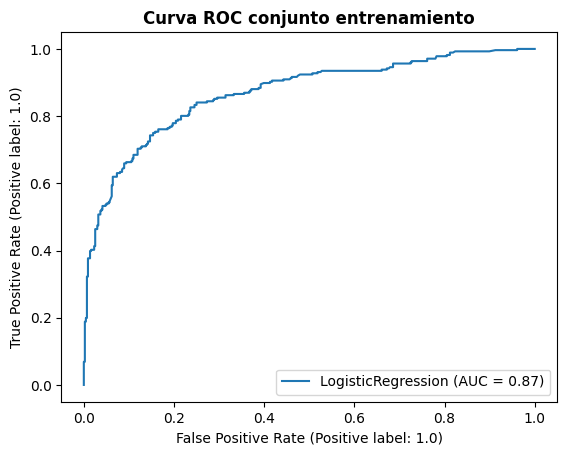

c:\Users\cj_li\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metrics.RocCurveDisplay.from_predictions` or :meth:`sklearn.metrics.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


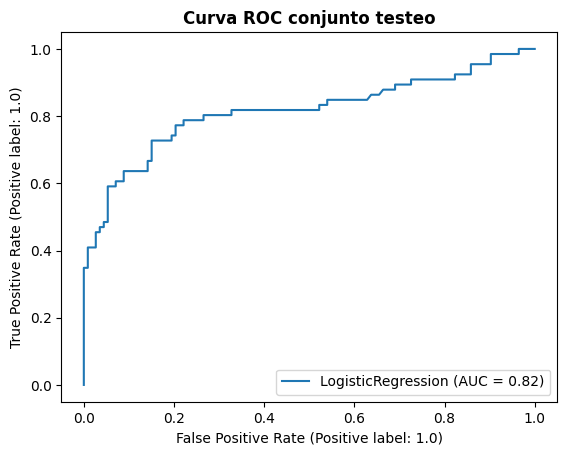

In [147]:
# Se visualiza la curva ROC y el AUC para el conjunto de entrenamiento
plt.figure(figsize=(6,6))
metrics.plot_roc_curve(modelo_regresion_logi, train_X, train_y)
plt.title('Curva ROC conjunto entrenamiento', weight='bold')
plt.show()

# Se visualiza la curva ROC y el AUC para el conjunto de testeo
metrics.plot_roc_curve(modelo_regresion_logi, test_X, test_y)
plt.title('Curva ROC conjunto testeo', weight='bold')
plt.show()

In [148]:
probabs = pd.DataFrame(modelo_regresion_logi.predict_proba(test_X)[:,1], columns=["$P$ Clase 1"])
probabs['Survived'] = np.array(test_y)

In [149]:
probabs.describe()

,$P$ Clase 1,Survived
count,179.000000,179.000000
mean,0.389433,0.368715
std,0.310927,0.483810
min,0.018507,0.000000
25%,0.111365,0.000000
50%,0.225953,0.000000
75%,0.654597,1.000000
max,0.980646,1.000000


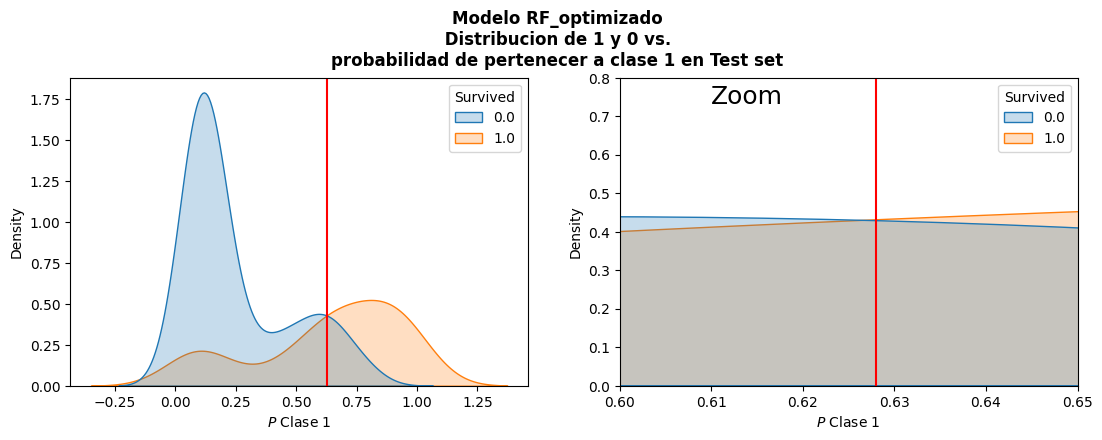

In [159]:
plt.figure(figsize=(13,4))

#plot 1:
plt.subplot(1, 2, 1)
sns.kdeplot(data = probabs, x="$P$ Clase 1", hue='Survived', fill=True)
plt.axvline(0.628, color='red')

#plot 2:
plt.subplot(1, 2, 2)
sns.kdeplot(data = probabs, x="$P$ Clase 1", hue= 'Survived', fill=True)
plt.text(0.61, 0.75, f'Zoom', fontsize = 18, ha="left", va="center")
plt.xlim(0.60, 0.65)
plt.ylim(0.00, 0.8) # (left, right)
plt.axvline(0.628, color='red')

plt.suptitle("Modelo RF_optimizado\n Distribucion de 1 y 0 vs. \nprobabilidad de pertenecer a clase 1 en Test set", y = 1.05, fontsize = 12, fontweight="bold")

plt.show()

### Una última aproximación podría ser por medio de una regresión logística.  
### Para esto debería volver a la parte de preprocesamiento de datos y obtener los WOEs (Weight of Evidence) para las variables categóricas

## Hacer las predicciones finales

In [234]:
# Hacer predicciones en el conjunto de prueba con el modelo
y_pred = opt_rf_model.best_estimator_.predict(titanic_test)

In [238]:
y_pred = pd.DataFrame(y_pred)
columnas = ['Survived']
y_pred.columns = columnas

In [239]:
y_pred.head()

,Survived
0,0.0
1,0.0
2,0.0
3,0.0
4,1.0


In [240]:
id =test_data['PassengerId']

In [241]:
predic = pd.concat([id, y_pred], axis=1)

In [242]:
predic.head()

,PassengerId,Survived
0,892,0.0
1,893,0.0
2,894,0.0
3,895,0.0
4,896,1.0


In [247]:
predic['Survived'].value_counts()

0.0    269
1.0    149
Name: Survived, dtype: int64

In [248]:
predic.to_csv('submission_CL_2.csv', index=False)

Probar:  
Eliminar Deck, luego aplicar KNN  
Regresión Logística  
Considerar solo variables categóricas  